In [ ]:
!pip install pytchat #載入聊天室的工具包
!pip install git+https://github.com/pytube/pytube #影片資訊工具包

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 4.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pytube/pytube to /tmp/pip-req-build-ex6c8zgu
  Running command git clone --filter=blob:none --quiet https://github.com/pytube/pytube /tmp/pip-req-build-ex6c8zgu
  Resolved https://github.com/pytube/pytube to commit d3d18691b3e99b2d3b4d620446b088a1c32896c6
  Preparing metadata (setup.py) ... d

In [ ]:
#圖表友善字體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-01-21 04:04:48--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.188.102, 64.233.188.138, 64.233.188.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/86vuge5aphb6q3pqmtobi4hn1bt9hvge/1674273825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4cd3b71a-7fde-4185-90f6-325bcb3a31d2 [following]
--2023-01-21 04:04:53--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/86vuge5aphb6q3pqmtobi4hn1bt9hvge/1674273825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4cd3b71a-7fde-4185-90f6-325bcb3a31d2
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0k

In [ ]:
!pip install nltk #NLP工具包

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install emosent-py #表情符號情緒分析工具包

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for emosent-py: filename=emosent_py-0.1.6-py3-none-any.whl size=28502 sha256=ced93161255903a782d43e754235c83e79de3f9e3e86146cd0c6aa54428ef76a
  Stored in directory: /root/.cache/pip/wheels/50/a5/c9/326d7777d7f7ab4d59bc6f5b2f5ed71a3783680e1b48b445c1
Successfully built emosent-py


In [ ]:
!pip install -U LeXmo #情緒分析工具包

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pytube import YouTube

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

import nltk
nltk.download('punkt')
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests, json, re, pytchat, time
from LeXmo import LeXmo
import numpy as np
# from emosent import get_emoji_sentiment_rank

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
url = 'https://youtu.be/7qfhmZqXE-0'
videoToken = url[17:]

In [ ]:
# 獲取影片標題
YouTube(url).title
# 獲取影片時長（後面在抓留言的時候，會將此時長作為進度條顯示）
videoTime = YouTube(url).length
formatVideoTime = str(videoTime//60//60)+':'+str(videoTime//60%60)+':'+str(videoTime%60)

## Gather Comments

In [ ]:
# 抓取留言
chats = []
chat = pytchat.create(video_id=videoToken)
while chat.is_alive():
    data = chat.get()
    for ele in data.items:
        chats.append({
            'authorName': ele.author.name,
            'authorType': ele.author.type,
            'mod': ele.author.isChatModerator,
            'type': ele.type,
            'elapsedTime': ele.elapsedTime,
            'message': ele.message,
            'messageEx': ele.messageEx
        })
    print(chats[-1]['elapsedTime'],'/',formatVideoTime)
    time.sleep(3)

IndexError: ignored

In [ ]:
# 紀錄聊天室爬蟲內容
with open('drunkZatsudan.json', 'w+') as jsonFile:
    json.dump(chats, jsonFile, indent=4)

## Organize Chat Room's Information

In [ ]:
# 讀取聊天室爬蟲內容
with open('Zatsudan.json', 'r') as jsonFile:
    chats = json.load(jsonFile)

In [ ]:
# 初步整理聊天室資訊
rawData = []
for ele in chats:
    sentence = []
    emoji = []
    ytEmoji = []
    for message in ele['messageEx']:
        if type(message)==str:
            sentence.append(message)
        else:
            if len(message['txt']) < 2:
                emoji.append({
                        'id': message['id'],
                        'txt': message['txt']
                })
            else:
                if message['txt'][1] != '_':
                    emoji.append({
                        'id': message['id'],
                        'txt': message['txt']
                    })
                else:
                    ytEmoji.append({
                        'id': message['id'],
                        'txt': message['txt']
                    })
    rawData.append({
        'authorName': ele['authorName'],
        'authorType': ele['authorType'],
        'mod': ele['mod'],
        'type': ele['type'],
        'elapsedTime': ele['elapsedTime'],
        'message': ele['message'],
        'messageWord': sentence,
        'emoji': emoji,
        'ytEmoji': ytEmoji
    })

In [ ]:
# 每則整理後資訊的範例
rawData[-80]

In [ ]:
# 整理後資訊存檔
with open('drunkZatsudan_rawData.json', 'w+') as jsonFile:
    json.dump(rawData, jsonFile, indent=4)

## Text Preprocessing

In [ ]:
with open('/content/drive/MyDrive/大四/文字探勘/期末專案/drunkZatsudan_rawData.json', 'r') as jsonFile:
    rawData = json.load(jsonFile)

In [ ]:
# 刪除重複字母
# target: 訊息
# limit: 遇到多少字母的時候才刪除
def singulate(target:str, limit:int):
    result = ''
    # print(sentence,end='->')
    for word in target.split():
        result += ' '
        if len(word) > 2:
            currWord = [word[0]]
            count = 0
            flag = False
            for i in range(len(word)-1):
                if word[i] == word[i+1]:
                    count += 1
                else:
                    currWord.append(word[i+1])
                    if count >= limit-1:
                        flag = True
                    count = 0
            if flag or count >= limit-1:
                result += ''.join(currWord)
                # print(''.join(currWord))
            else:
                result += word
                # print(word)
        else:
            result += word
    return result[1:]

In [ ]:
# 針對直播的語料庫
# 將常見的縮寫解壓縮
chatCorpus = {
    'u': 'you',
    'lmao': 'laugh my ass off',
    'cuz': 'because',
    'fr': 'for real',
    'lol': 'laugh out loud',
    'af': 'as fuck',
    'irl': 'in real life',
    'ily': 'i love you',
    'brb': 'be right back',
    'bs': 'bullshit',
    'tldr': 'too long, didn\'t read',
    'tl;dr': 'too long, didn\'t read',
    'naur': 'no',
    'omg': 'oh my god',
    'wtf': 'what the fuck',
    'wth': 'what the hell',
    'tf': 'the fuck',
    'aww': 'so cute',
    'eww': 'yuck',
    'eng': 'english',
    'en': 'english',
    'jp': 'japan',
    'w/': 'with',
    'w/o': 'without',
    'tbh': 'to be honest',
    'aka': 'as known as',
    'btw': 'by the way',
    'xoxo': 'kisses and hugs',
    'bff': 'best friend forever',
    'bro': 'brother',
    'sis': 'sister',
    'grl': 'girl',
    'bt': 'but',
    'ic': 'i see',
    'afk': 'away from keyboard',
    'nm': 'never mind',
    'plz': 'please',
    'pls': 'please',
    'rip': 'rest in peace',
    'tbd': 'to be determined',
    'tyt': 'take your time',
    'ur': 'your',
    'thx': 'thanks',
    'idk': 'i don\'t know',
    'jk': 'just kidding',
    'smh': 'shake my head',
    'np': 'no problem',
    'rofl': 'rolling on the floor laughing',
    'imho': 'in my humble opinion',
    'imo': 'in my opinion',
    'etc': 'and so on',
    'gotta': 'got to',
    'gonna': 'going to',
    'wanna': 'want to',
    'woulda': 'would have',
    'sorta': 'sort of',
    'kinda': 'kind of',
    'hafta': 'have to',
    'coulda': 'could have',
    'musta': 'must have',
    'losta': 'a lot of',
    'gg': 'good game',
    'nt': 'nice try',
    'ns': 'nice shot',
    'asap': 'as soon as possible',
    'cya': 'see you',
    'wdym': 'what do you mean',
    'stfu': 'shut the fuck up',
    'tia': 'thanks in advance',
    'vs': 'versus',
    'g2g': 'got to go',
    'wc': 'water closet',
    'unseiso': 'dirty minded',
    'sus': 'suspicious',
    'sussy': 'suspicious',
    'ikz': 'let\'s go',
    'ayo': 'hey, you',
    'tskr': 'it really saves me',
    'caught in 4k': 'i got a evidence of what you\'ve done',
    'uwe': 'crying',
    'zzz': 'sleeping',
    'boomer': 'old people',
    'zoomer': 'young man',
    'kiddo': 'kid',
    'dmg': 'damage',
    'min': 'minute',
    'mins': 'minutes',
    'sec': 'second',
    'secs': 'seconds',
    'mogu': 'eating',
    'otsu': 'thank you for your work',
    'ganba': 'do your best',
    'pog': 'awesome',
    'sc': 'donation',
    'supa': 'donation',
    'ppl': 'people',
    'bbg': 'baby girl',
    'sheesh': 'damn',
    'rn': 'right now',
    'tbf': 'to be fair',
    'ikr': 'i know, right?',
    'o7': 'respect',
    'yeet': 'throw',
    'copium': 'lying to yourself',
    'forgor': 'forgot',
    'hbu': 'how about you',
    'gm': 'good morning',
    'gn': 'good night',
    'tho': 'though',
    'omfg': 'oh my fucking god',
    'gg': 'good game',
    'wb': 'welcome back',
    'thx': 'thanks',
    'va': 'voice acting',
    'daz': 'that\'s',
    'y\'all': 'you all'
}

In [ ]:
# 解壓縮縮寫
# target: 訊息
# corpus: 解壓縮參照的語料庫
def refCorpus(target:str, corpus:dict):
    result = ''
    lowSent = target.lower()
    for word in lowSent.split():
        result += ' '
        if word in corpus.keys():
            result += corpus[word]
        else:
            result += word
    return result[1:]

In [ ]:
for chat in rawData:
    chat['messageWord'] = ''.join(chat['messageWord'])
    chat['uniMessage'] = singulate(chat['messageWord'], 3)
    chat['unzipMessage'] = refCorpus(chat['uniMessage'], chatCorpus)

In [ ]:
# 前處理結果
rawData[2340]

{'authorName': 'Mominty28',
 'authorType': 'MEMBER',
 'mod': False,
 'type': 'textMessage',
 'elapsedTime': '11:26',
 'message': 'Red wine based!! :purple_heart::purple_heart:',
 'messageWord': 'Red wine based!! ',
 'emoji': [{'id': '💜', 'txt': ':purple_heart:'},
  {'id': '💜', 'txt': ':purple_heart:'}],
 'ytEmoji': [],
 'uniMessage': 'Red wine based!!',
 'unzipMessage': 'red wine based!!'}

In [ ]:
with open('drunkZatsudan_preprocess.json', 'w+') as jsonFile:
    json.dump(rawData, jsonFile, indent=4)

# Keyword Extraction & Emotion Analysis

In [ ]:
# 讀取聊天室內容
with open('/content/drive/MyDrive/大四/文字探勘/期末專案/Movie_preprocess.json', 'r') as jsonFile:
    chats = json.load(jsonFile)

In [ ]:
time_per_halfMin = {}
for message in chats:
    if int(message['elapsedTime'][-2]) > 3:
        time = message['elapsedTime'][:-3]+':30'
    else:
        time = message['elapsedTime'][:-3]+':00'
    if time not in time_per_halfMin.keys():
        time_per_halfMin[time] = [message]
        # comments_per_sec[time] = [message.lower().split('　')]
    else:
        time_per_halfMin[time].append(message)

In [ ]:
count_per_halfMin = []
for comments in time_per_halfMin.values():
    count_per_halfMin.append(len(comments))

Text(0.5, 0, 'time')

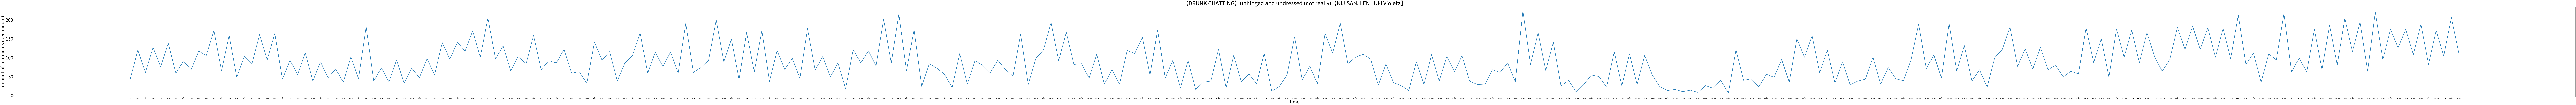

In [ ]:
plt.rcParams["figure.figsize"] = [550, 20]
plt.rcParams.update({'font.size': 54})
plt.plot(list(time_per_halfMin.keys()),
         count_per_halfMin,
         linewidth=5)

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

plt.xticks(fontsize=18)
plt.title(YouTube(url).title, {'fontname':'Taipei Sans TC Beta'})
plt.ylabel('amount of comments (per minute)')
plt.xlabel('time')

In [ ]:
avg = round(sum(count_per_halfMin)/len(count_per_halfMin))

over_avg = []
for time in time_per_halfMin.keys():
    if len(time_per_halfMin[time]) >= avg:
        over_avg.append(time)

print(avg, ': ',over_avg)
print('->共',len(over_avg))

49 :  ['-0:00', '0:00', '0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '9:00', '10:00', '10:30', '11:00', '12:00', '13:00', '15:00', '16:00', '16:30', '17:00', '18:00', '19:00', '20:00', '20:30', '21:00', '22:00', '23:00', '23:30', '24:00', '27:00', '27:30', '28:00', '28:30', '29:00', '31:30', '32:00', '34:00', '35:00', '36:00', '37:00', '40:00', '42:00', '44:00', '45:00', '46:00', '48:00', '48:30', '51:00', '52:00', '52:30', '53:00', '54:00', '55:00', '55:30', '56:00', '58:00', '59:00', '1:00:00', '1:02:00', '1:03:00', '1:04:00', '1:06:00', '1:08:00', '1:08:30', '1:09:00', '1:09:30', '1:10:00', '1:12:00', '1:13:00', '1:15:00', '1:15:30', '1:16:00', '1:17:00', '1:18:00', '1:19:00', '1:19:30', '1:20:00', '1:24:00', '1:24:30', '1:25:00', '1:25:30', '1:26:00', '1:29:00', '1:33:00', '1:34:00', '1:35:00', '1:36:00', '1:37:00', '1:38:00', '1:39:00', '1:39:30', '1:40:00', '1:45:00', '1:47:00', '1:48:00', '1:50:00

In [ ]:
setOfUniMessage = {}
setOfUnzipMessage = {}
for time in time_per_halfMin.keys():
    setOfUniMessage[time] = ' '.join(
        ele['uniMessage'] for ele in time_per_halfMin[time] if ele['uniMessage'] != '' and ele['uniMessage'] != ' ')
    setOfUnzipMessage[time] = ' '.join(
        ele['unzipMessage'] for ele in time_per_halfMin[time] if ele['unzipMessage'] != '' and ele['unzipMessage'] != ' ')

In [ ]:
results = {}
for time in over_avg:
    ## keyword
    # initialise TfidfVectorizer
    vectoriser = TfidfVectorizer(norm = None)
    # obtain weights of each term to each document in corpus (ie, tf-idf scores)
    tf_idf_scores = vectoriser.fit_transform([setOfUniMessage[time]])
    # get vocabulary of terms
    feature_names = vectoriser.get_feature_names()
    corpus_index = [n for n in [setOfUniMessage[time]]]
    # create pandas DataFrame with tf-idf scores: Term-Document Matrix
    df_tf_idf = pd.DataFrame(tf_idf_scores.T.todense(), index = feature_names, columns = [time])
    result = df_tf_idf.to_dict()[time]

    keyword = []
    for word in result.keys():
        # if word not in stopwords.words('english') and result[word] > 10:
        #     keyword.append(word)
        if result[word] > 5:
            keyword.append(word)
    results[time] = {}
    results[time]['keyword'] = keyword

    ## emotion
    max = 0
    if setOfUnzipMessage[time] != '':
        emo = LeXmo.LeXmo(setOfUnzipMessage[time])
        emo.pop('text', None)
        count = 0
        for e in emo:
            # print(e, emo[e])
            if e != 'positive' and e != 'negative':
                if emo[e] == 0.0:
                    count += 1
                if count == 8:
                    results[time]['emotion_score'] ={}
                if emo[e] > max:
                    max = emo[e]
                    highest_emo = e
                    if emo[e] > 0.08:
                        results[time]['emotion_score'] = {e: max}
                    else:
                        results[time]['emotion_score'] = {}

    ## emoji
    count = {}
    for message in time_per_halfMin[time]:
        for emoji in message['emoji']:
            if emoji['txt'] != '':
                if emoji['txt'] in count.keys():
                    count[emoji['txt']] += 1
                else:
                    count[emoji['txt']] = 1
        for emoji in message['ytEmoji']:
            if emoji['txt'] != '':
                if emoji['txt'] in count.keys():
                    count[emoji['txt']] += 1
                else:
                    count[emoji['txt']] = 1
    results[time]['emoji'] = count

In [ ]:
roughStopword = ['the', 'was', 'is', 'are', 'were', 'to', 'of', 'for', 'in', 'and']

In [ ]:
for time in results.keys():
    print(time)
    for keyword in results[time]['keyword']:
        if keyword in roughStopword:
            continue
        for message in time_per_halfMin[time]:
            if keyword in message['uniMessage'].split(' '):
                print(keyword,'->', end='')
                print(message['uniMessage'])
                break
    print(results[time]['emotion_score'])
    print(results[time]['emoji'])
    print('-'*30)

-0:00
hey ->hey hey hey
{}
{':_MembaaaHey:': 108, ':red_heart:': 8, ':smiling_face:': 1, ':_MembaaaCool:': 1}
------------------------------
0:00
hey ->hey hey hey
{}
{':_MembaaaHey:': 459, ':_MembaaaStick:': 3, ':ram:': 3, ':red_heart:': 4, ':_MembaaaSheero:': 1, ':_MembaaaBleep:': 1, ':_MembaaaHype:': 1, ':_MembaaaFML:': 1}
------------------------------
0:30
hey ->Hey hey hey
{}
{':_MembaaaHey:': 209, ':_MembaaaHype:': 3, ':_MembaaaFML:': 2, ':_MembaaaHeart:': 2}
------------------------------
1:00
hey ->hey hey hey
{}
{':_MembaaaHey:': 364, ':_MembaaaHeart:': 3, ':virtualhug:': 1, ':ram:': 1, ':high_voltage:': 1, ':milky_way:': 1, ':man_dancing:': 3}
------------------------------
1:30
hey ->hey hey hey
{}
{':_MembaaaHey:': 152, ':red_heart:': 1, ':_MembaaaNal:': 1, ':ram:': 1, ':grinning_cat:': 1}
------------------------------
2:00
hey ->hey hey hey
{}
{':_MembaaaHey:': 364, ':_MembaaaNote:': 1, ':_MembaaaFulLoad:': 1}
------------------------------
2:30
hey ->hey hey hey~
{}
{':